In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global the millennia,sector 37d,0.60,9231.0,2,2,3,7.0,New Property,625.0,0,0,0,0,0,1,35
1,flat,shree vardhman victoria,sector 70,1.80,9231.0,3,5,3,0.0,New Property,2167.0,0,0,0,0,0,1,72
2,flat,signature global park,sohna road,0.87,7190.0,3,2,3,4.0,Relatively New,1210.0,0,0,0,0,0,1,58
3,flat,conscient heritage max,sector 102,2.00,9307.0,3,4,3+,13.0,Relatively New,1900.0,1,1,0,0,0,2,174
4,flat,emaar mgf emerald floors premier,sector 65,2.35,16207.0,3,3,3,2.0,Relatively New,1500.0,1,1,0,0,0,2,64


In [5]:
latlong = pd.read_csv('latlong.csv')

In [6]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()

In [13]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.939184,5966.683673,1571.287551,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [14]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [15]:
new_df.to_csv('data_viz1.csv',index=False)

In [16]:
df1 = pd.read_csv(r"C:\Users\karal\OneDrive\Desktop\ML Projects\Real Estate Price Predictor and Recommendation System\Data Cleaning and Preprocessing\gurgaon_properties.csv")

In [17]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,14 Bedroom House for sale in DLF Phase 3,house,independent,3.20,59259.0,540.0,Plot area 60(50.17 sq.m.),14,14,3+,not available,"Three Side Corner, DLF Phase 3, Gurgaon, Haryana",6.0,West,1 to 5 Year Old,"['Dlf phase 3 metro station', 'Micromax moulsa...",Rental income option for sale in 60 sq.Yds. Fu...,"['14 Bed', '14 Wardrobe', '1 Water Purifier', ...","['Water Storage', 'Park']","['Environment4 out of 5', 'Lifestyle5 out of 5..."
1,19 Bedroom House for sale in Sector 17A Gurgaon,house,independent,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,"study room,servant room,store room,pooja room","690, Sector 17A Gurgaon, Gurgaon, Haryana",4.0,North-West,1 to 5 Year Old,"['Iffco chowk metro station', 'Citi bank ATM',...","8% return yearly, very safe sector, supportive...",NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,2 BHK Flat in Sector 37D Gurgaon,flat,signature global the millennia,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,3,not available,"702, Sector 37D Gurgaon, Gurgaon, Haryana",7.0,NaN,0 to 1 Year Old,"['Jharsha Chowk', 'Hero Honda Chowk', 'Rajiv C...",It's 500 meter from dwarka express way.,NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
3,3 BHK Flat in Sector 70 Gurgaon,flat,shree vardhman victoria,1.80,9230.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3,5,3,not available,"Sector 70 Gurgaon, Gurgaon, Haryana",0.0,NaN,0 to 1 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...","Ground floor corner property, secluded and pri...","['1 Modular Kitchen', '4 AC', 'No Bed', 'No Ch...","['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of..."
4,3 BHK Flat in Sohna,flat,signature global park,0.87,7190.0,1210.0,Built Up area: 1210 (112.41 sq.m.)Carpet area:...,3,2,3,not available,"Sohna Sector 36, Sohna, Gurgaon, Haryana",4.0,NaN,undefined,"['Sector 55-56 metro', 'Global city centre', '...",Multistorey apartment is available for sale. I...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,"['Green Area5 out of 5', 'Construction5 out of..."


In [18]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [19]:
wordcloud_df.head()

,features,sector
0,"['Water Storage', 'Park']",sector 37d
1,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 70
2,"['Power Back-up', 'Feng Shui / Vaastu Complian...",sohna road
3,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 102
4,NaN,sector 65


In [20]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [21]:
main

['Water Storage',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'False Ceiling Lighting',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Spacious Interiors',
 'Waste Disposal',
 'Club house / Community Center',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Water softening plant',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lig

In [22]:
from wordcloud import WordCloud

In [23]:
feature_text = ' '.join(main)

In [24]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [25]:
feature_text

'Water Storage Park Feng Shui / Vaastu Compliant Private Garden / Terrace False Ceiling Lighting Water Storage Park Visitor Parking Natural Light Internet/wi-fi connectivity Airy Rooms Spacious Interiors Waste Disposal Club house / Community Center Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Park Shopping Centre Fitness Centre / GYM Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Visitor Parking Swimming Pool Park Shopping Centre Fitness Centre / GYM Club house / Community Center Water softening plant Centrally Air Conditioned Water purifier Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming 

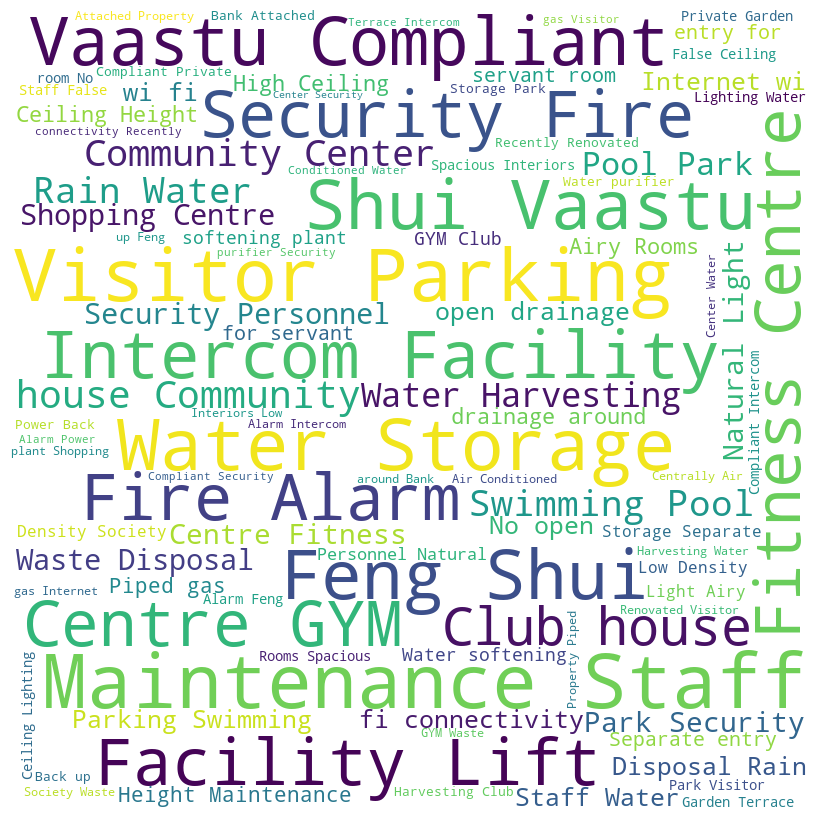

In [26]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [27]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [28]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [29]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [30]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\karal\AppData\Local\Temp\ipykernel_14380\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\karal\AppData\Local\Temp\ipykernel_14380\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

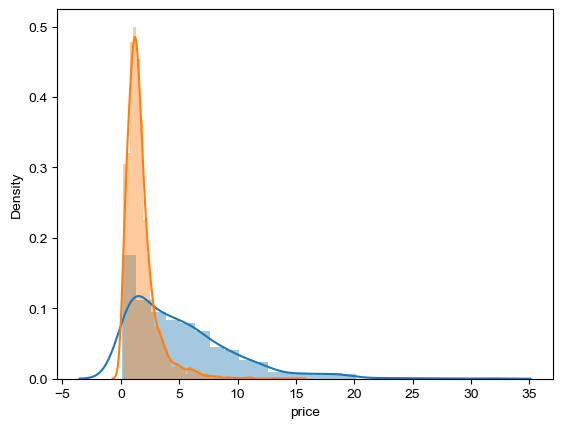

In [31]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [32]:
new_df['sector'].unique().tolist().insert(0,'overall')